In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import networkx as nx
import random
from pyswarm import pso

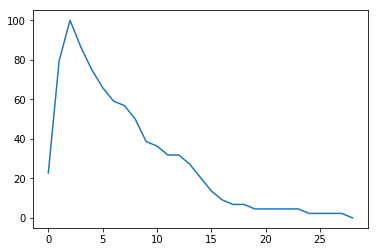

[  2.12765957  12.76595745  80.85106383 100.          91.4893617
  87.23404255  78.72340426  74.46808511  72.34042553  72.34042553
  72.34042553  65.95744681  57.44680851  55.31914894  51.06382979
  46.80851064  42.55319149  38.29787234  36.17021277  34.04255319
  34.04255319  31.91489362  27.65957447  27.65957447  27.65957447
  27.65957447  25.53191489  25.53191489  25.53191489]


In [26]:
def sir(G,p,q,num_infected):
    n = nx.number_of_nodes(G)
    I = np.unique(np.random.choice(range(n), num_infected, replace=False))
    A = np.array(nx.to_numpy_matrix(G))
    S = np.unique(np.delete(np.arange(n),I))
    R = np.array([])
    numberofI = np.array([num_infected])
    for i in range(28):# google trend
        if len(R) == 0:
            prob = np.triu((np.random.rand(n,n)), 1)
            prob = np.mat(prob + prob.T)
            B = A+0 # this matrix is adjacency matrix for nodes in I with their neighbours
            B[S.astype(int),:] = 0  #row's indexes are infected nodes, columns are susceptible or recover
            B[:,I.astype(int)] = 0
            prob_infected = np.array(B)*np.array(prob) # entries shows the probability theyre infected
            infct = 1*(prob_infected>1-p)
            newly_infected = np.array(np.where(np.sum(infct,axis=0)>0)[0])
            I1 = np.unique(np.concatenate((np.array(I),newly_infected),axis = None)) #infected for temp before - R
            S = np.delete(np.arange(n),I1)
    #this is done for Infected nodes, infecting their neighbors
    #next, is infected nodes that recover
    #we create a 1 Dimensional array with the number of entries the same as no of infected (updated)
    #the input for this array is random number from 0 to 1
    #when it exceeds q, the node is recovered and no longer infecting others
            recover_array = np.random.rand(I.size)
            R = I[(recover_array>1-q)]
            I = np.array(list(set(I1.tolist()) - set(R.tolist())))
            S = S
            numberofI = np.append(numberofI,I.size)
        else:
            prob = np.triu((np.random.rand(n,n)), 1)
            prob = np.mat(prob + prob.T)
            B = A+0 # this matrix is adjacency matrix for nodes in I with their neighbours
            B[S.astype(int),:] = 0 #row's indexes are infected nodes, columns are susceptible or recover
            B[:,I.astype(int)] = 0
            B[R.astype(int),:] = 0
            B[:,R.astype(int)] = 0
            prob_infected = np.array(B)*np.array(prob) # entries shows the probability theyre infected
            infct = 1*(prob_infected>1-p)
            newly_infected = np.array(np.where(np.sum(infct,axis=0)>0)[0])
            I1 = np.unique(np.concatenate((np.array(I),newly_infected),axis = None)) #infected for temp before - R
            S = np.delete(np.arange(n),I1)
            recover_array = np.random.rand(I.size)
            R = np.append(R,I[(recover_array>1-q)])
            I = np.array(list(set(I1.tolist()) - set(R.tolist())))
            S = S
            numberofI = np.append(numberofI,I.size)
    normalized_I = (numberofI)/max(numberofI)*100
    return normalized_I

#a = sir(nx.erdos_renyi_graph(50,0.4),0.5,0.5,25)

a = sir(nx.watts_strogatz_graph(50,40,0),0.1,0.1,10)
plt.plot(a)
plt.show()
print(sir(nx.complete_graph(50),0.2,0.05,1))


PSO

In [29]:
G = nx.watts_strogatz_graph(50, 10, 0.5) 
#29 days of FIFA world cup trend
google_trend = [65,
53,
64,
57,
62,
66,
69,
65,
63,
75,
54,
50,
73,
100,
59,
46,
45,
46,
45,
44,
58,
63,
45,
41,
42,
46,
50,
60,
55]
def f(X):
    p = X[0]
    q = X[1]
    return np.sum(sir(G,p,q,int(0.65*50))-google_trend)**2

lb = [0, 0] # lower bounds for p and q
ub = [1, 1] # upper bounds for p and q

xopt, fopt = pso(f, lb, ub)

print("Minimum p,q = ", xopt)
print("error = ", fopt)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


Stopping search: Swarm best objective change less than 1e-08
Minimum p,q =  [0.65468476 0.04726099]
error =  0.017013232514180392
